# Instagram Bot Detector


# 1.0 Loading Data and Creating the Tree Model


###  1.1 Importing Modules/Libraries

In [1]:
#Importing Libraries/Modules
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1.2 Importing dataset

In [2]:
data = pd.read_csv('insta_bot.csv')
data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
570,1,0.55,1,0.44,0,0,0,0,33,166,596,1
571,1,0.38,1,0.33,0,21,0,0,44,66,75,1
572,1,0.57,2,0.00,0,0,0,0,4,96,339,1
573,1,0.57,1,0.00,0,11,0,0,0,57,73,1


### 1.3 Creating Tree Model

In [10]:
#Load data into variables for the algorithm
features = ['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows'] 

x = data[features]
y = data['fake']

#Split our data into test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#Train and fit tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

#Testing our model on test data
predictions = clf.predict(x_test)
actuals = list(y_test)

### 1.4 Defining accuracy funtion + Calculating model accuracy

In [11]:
def accuracy(actuals, predictions):
    
    actuals = list(y_test)
    number_of_samples = len(actuals)
    number_of_correct_predictions = 0

    for i in range(number_of_samples):
        prediction = predictions[i]
        actual = actuals[i]
        if prediction == actual:
            number_of_correct_predictions += 1

    accuracy = number_of_correct_predictions / number_of_samples
    print(accuracy * 100)
    
#Using accuracy function on test data collected in previous code
accuracy(actuals, predictions)

87.89473684210526


# 2.0 Visualizations


### 2. 1 Loading in key data for graphs


In [12]:
real_df = data[data["fake"] == 0] #Data from real instagram accounts
rfollowers = real_df["#followers"].sum() # Sum of followers of real instagram accounts
avg_real = rfollowers / real_df.shape[0]
print('Total number of followers for real accounts: ', rfollowers)
print('Average number of followers for real accounts: ', avg_real)

fake_df = data[data["fake"] == 1] #Data from fake instagram accounts
ffollowers = fake_df["#followers"].sum() # Sum of followers of fake instagram accounts
avg_fake = ffollowers / fake_df.shape[0]
print('Total number of followers for bot accounts: ', ffollowers)
print('Average number of followers for bot accounts: ', avg_fake)

Total number of followers for real accounts:  48435132
Average number of followers for real accounts:  168763.5261324042
Total number of followers for bot accounts:  31849
Average number of followers for bot accounts:  110.58680555555556


### 2.2 Bar Graph based on Average followers for real and bot accounts

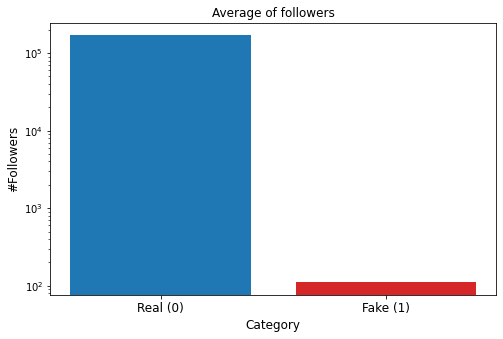

In [13]:
x = [0, 1]
y = [avg_real, avg_fake]

plt.figure(figsize=(8, 5))
plt.bar(x, y, color=['tab:blue', 'tab:red'])
ax = plt.gca()
ax.set_xticks([0, 1])
ax.set_xticklabels(['Real (0)', 'Fake (1)'], fontsize=12)
plt.ylabel('#Followers', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.title('Average of followers')
plt.yscale('log')

### 2.3 Bar Graph based on total number of followers for each real account data and bot account data

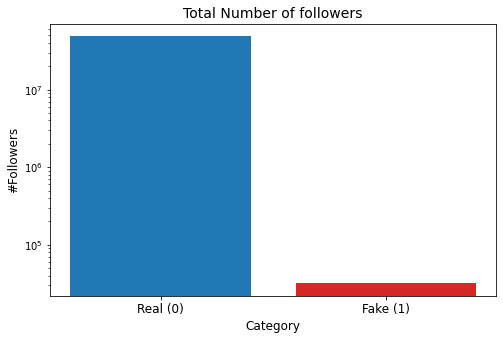

In [14]:
x = [0, 1]
y = [rfollowers, ffollowers]

plt.figure(figsize=(8, 5))
plt.bar(x, y, color=['tab:blue', 'tab:red'])
ax = plt.gca()
ax.set_xticks([0, 1])
ax.set_xticklabels(['Real (0)', 'Fake (1)'], fontsize=12)
plt.ylabel('#Followers', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.title('Total Number of followers', fontsize=14)
plt.yscale('log')

### 2.4 Tree Model Visualization

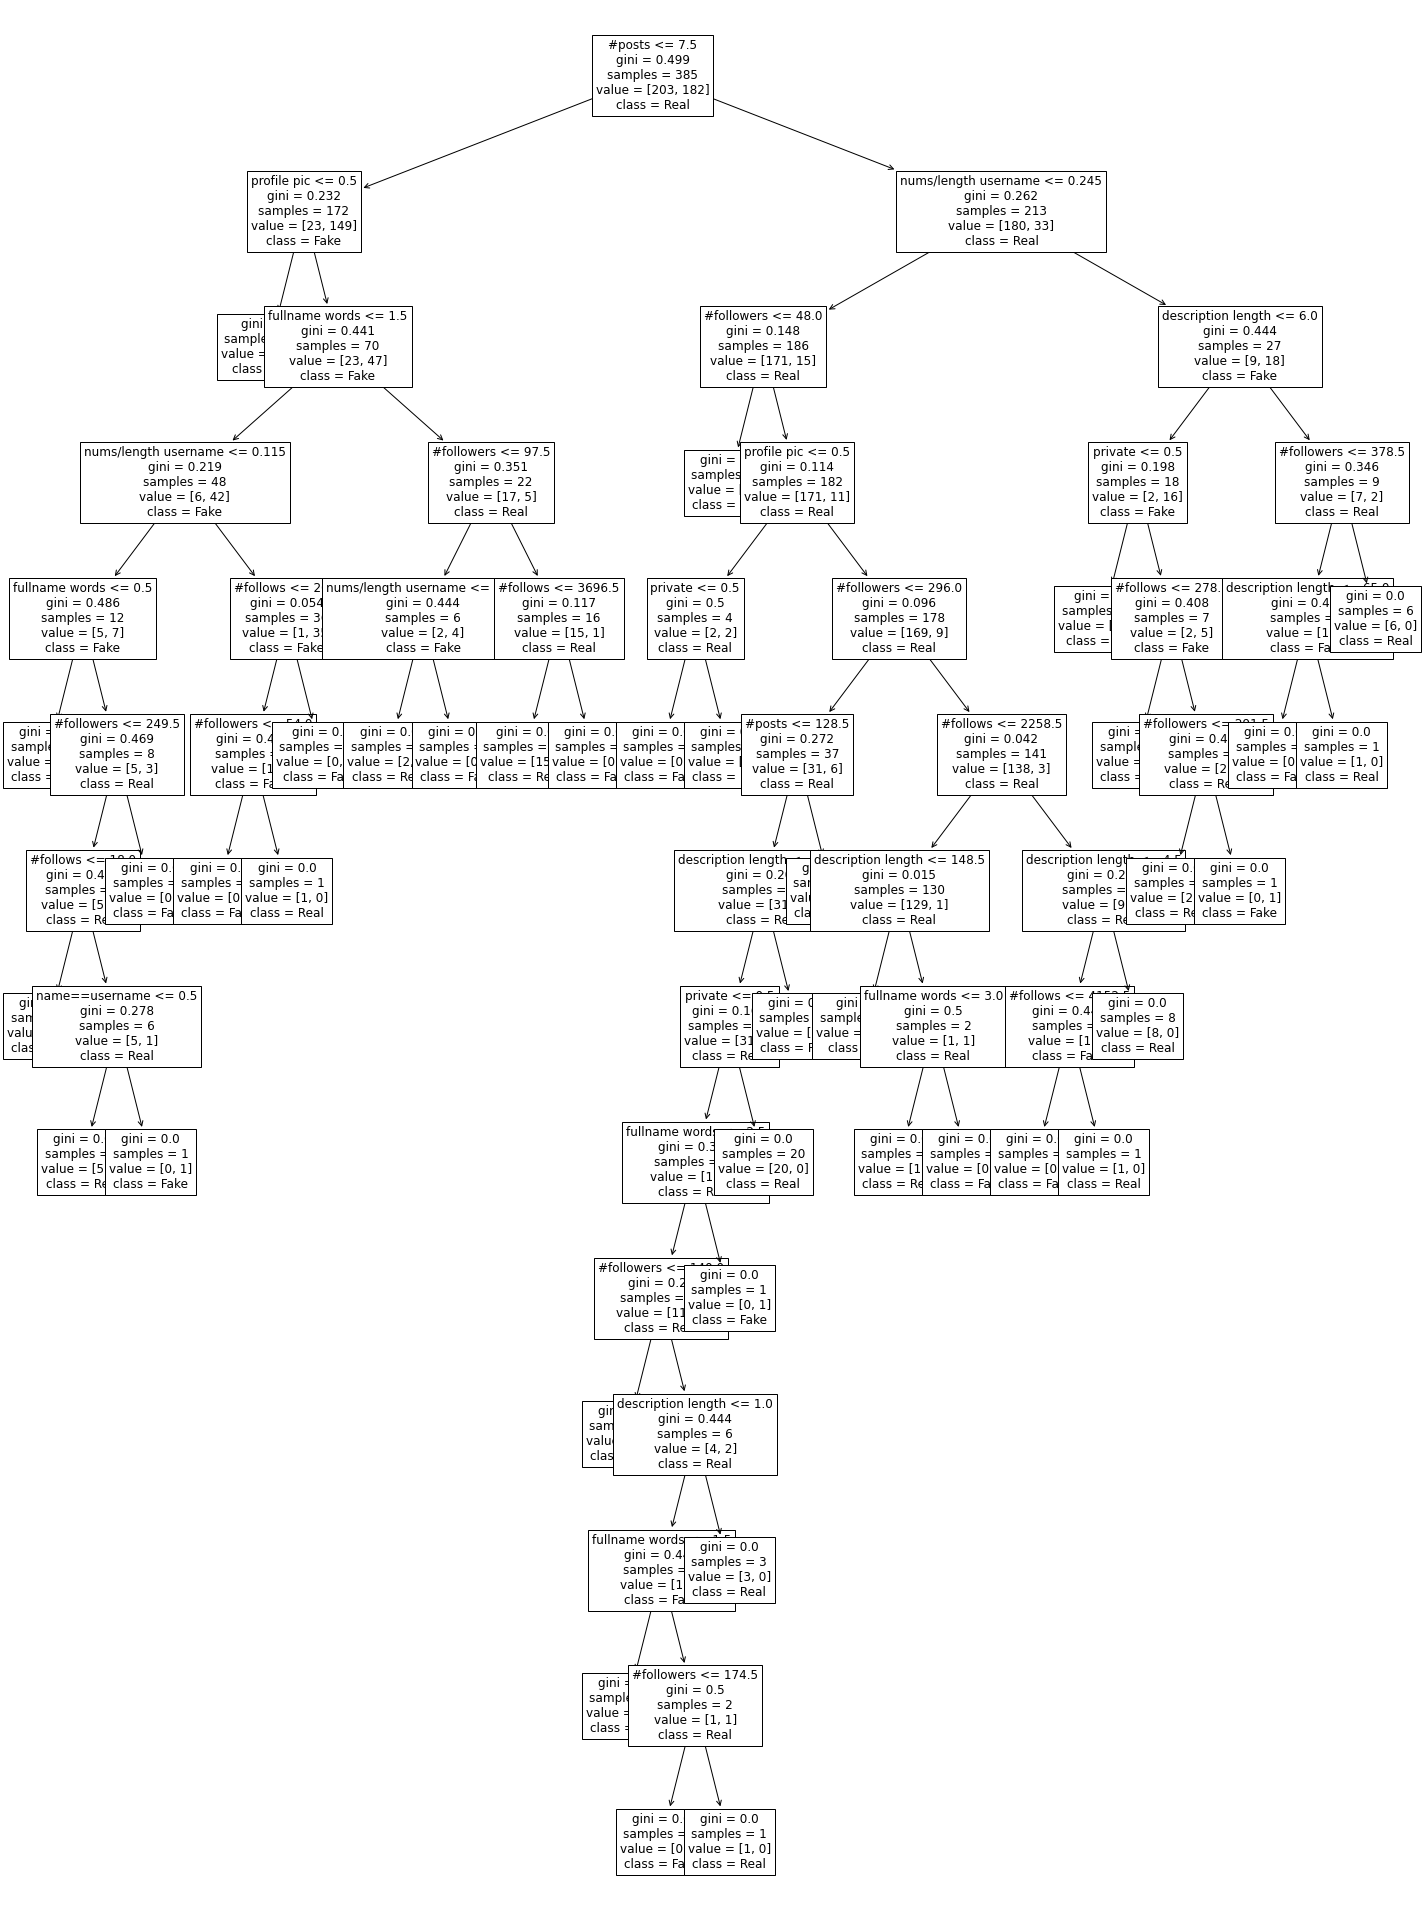

In [21]:
plt.figure(figsize=(25, 35))
tree.plot_tree(clf, 
               feature_names=features, 
               class_names=['Real', 'Fake'], 
               fontsize=12)
print()

# 3.0 Exploratory Data Analysis

### 3.1 Creating Confusion Matrix

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[73 11]
 [12 94]]


### 3.2 Loading matrix into user friendly visual

<AxesSubplot:>

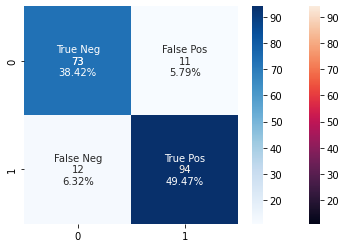

In [17]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Understanding the confusion matrix
Keeping in mind the small set of test data we had to work with the confusion matrix offers a visualization of the accuracy we calculated early with our accuracy function. 
    True Positive and True Negative Displays the correct number of predicted values; In total 87.89% Correct. False Negative and False Positive Displays the incorrect number of predicted values; In total 12.11% Incorrect